In [25]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/features3_train_2.csv")
X = data[data.columns[:-1]]
y = data['VV']
# sklearn impute advanced(IterativeImpute)

In [26]:
random_seed = 42
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=random_seed)

,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,...,dep-9201,fed-9201,fed-avg,ck-changame,dep-changame,ck-changtime,dep-changtime,0.0,1.0,2.0
1488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,17022.0,-1.0,-1.0,619745.0,683058.0,33.0,136.0,1,0,0
9162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,0.0,0.0,0.0,215805.0,-1.0,14.0,1,0,0
23314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
16952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3152313.0,0.0,-1.0,4484372.0,1099638.0,81.0,23.0,1,0,0
18367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,0,0,1
5390,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1,0,0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1,0,0
15795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,1,0,0


In [27]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.metrics import f1_score
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_vt = vt.fit_transform(X_train)
X_valid_vt = vt.transform(X_valid)
X_train_vt

array([[ 0.000000e+00,  0.000000e+00,  1.701805e+06, ...,  3.300000e+01,
         1.360000e+02,  1.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -1.000000e+00,
         1.400000e+01,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -1.000000e+00,
        -1.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  2.600000e+05, ..., -1.000000e+00,
         0.000000e+00,  0.000000e+00]])

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

feature_selection_tree = ExtraTreesClassifier(n_estimators=50)
feature_selection_tree.fit(X_train_vt, y_train)
feature_selection_tree.feature_importances_
feature_selection_model = SelectFromModel(feature_selection_tree, prefit=True)
X_train_selected = feature_selection_model.transform(X_train_vt)
X_valid_selected = feature_selection_model.transform(X_valid_vt)
X_train_selected


array([[ 1.7160000e+03,  1.2432000e+05,  4.2000000e+01, ...,
         1.7022000e+04,  6.8305800e+05,  1.3600000e+02],
       [ 1.0800000e+02,  1.8530500e+05,  2.1294632e+01, ...,
        -1.0000000e+00,  2.1580500e+05,  1.4000000e+01],
       [ 6.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.9000000e+01,  0.0000000e+00,  0.0000000e+00, ...,
        -1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  1.2560000e+03,  1.0000000e+00, ...,
         0.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       [ 7.0620000e+03,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]])

In [28]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE,SVMSMOTE
oversample = SVMSMOTE()
X_over, y_over = oversample.fit_resample(X_train_selected, y_train)
y_over.value_counts()

0    19170
1    19170
Name: VV, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_seed = 42
rfc = RandomForestClassifier(random_state=random_seed)
rfc.fit(X_over, y_over)

y_train_pred = rfc.predict(X_over)
y_valid_pred = rfc.predict(X_valid_selected)

from sklearn.metrics import f1_score
print(f1_score(y_over, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

0.9978358928897348
0.27831715210355984


In [ ]:
#max_depth
#min_sample_split
#max_leaf_nodes
#min_samples_leaf
#n_estimators
#max_sample (bootstrap sample)
#max_features

In [32]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import validation_curve
param_range = [int(x) for x in np.linspace(start=3, stop=15, num=13)]
train_scores, test_scores = validation_curve(estimator=rfc,X=X_train_selected, y=y_train,
                                         param_name='max_depth',
                                         param_range=param_range,
                                         scoring='f1',
                                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

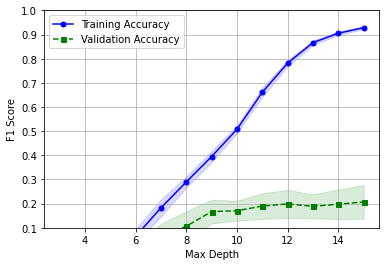

In [36]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s', linestyle='--', markersize=5, label='Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.ylim([0.1, 1.0])
plt.show()